In [360]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [397]:
balance= 1000
bet = 10
test = 1
count = 10000
datapeak = []
datacount = []
catchpeak = []
datapeakcount = []


while count>=1:
    
    while balance >= 0:
        redandblack = np.random.randint(1,38)
        if (redandblack in range(1,19)):
            balance += bet                            ### İLGİNÇ SONUÇLAR ALDIM
            catchpeak.append(balance)
            bet=10
            test += 1
        elif(redandblack in range(19,37)):
            test += 1
            balance -= bet
            catchpeak.append(balance)
            bet *= 2
        else:
            test += 1
            balance -= bet
            bet *= 2
    datacount.append(test)
    datapeak.append(np.max(catchpeak))
    count -=1
    balance = 1000
    bet=10
    test=1
    datapeakcount.append(catchpeak.index(max(catchpeak)))
    catchpeak.clear()
    
        
print(datacount)
print(datapeak)
print(datapeakcount)
print(max(datapeak))
        

[10486, 7561, 259, 74, 1962, 8, 15330, 89, 1099, 254, 281, 207, 1441, 212, 200, 1815, 21, 612, 2078, 19, 116, 517, 265, 397, 327, 693, 1031, 340, 82, 333, 52, 165, 848, 88, 552, 49, 228, 247, 863, 91, 18, 317, 275, 16, 264, 153, 13, 245, 124, 219, 343, 1297, 1721, 118, 58, 257, 114, 797, 226, 30, 1367, 254, 482, 27, 168, 290, 19, 7262, 38, 77, 60, 55, 72, 66, 25, 713, 185, 154, 195, 36, 125, 11, 27, 815, 20, 695, 2964, 60, 192, 244, 150, 22, 169, 3457, 25, 295, 544, 173, 24, 98, 302, 111, 62, 31632, 50, 27, 174, 459, 174, 39, 59, 20, 15617, 546, 962, 1122, 1059, 362, 641, 738, 2700, 3523, 15577, 595, 6617, 25, 138, 181, 240, 126, 32, 395, 146, 1405, 450, 11, 1832, 2740, 857, 2480, 1662, 2209, 259, 114, 53269, 120, 140, 1934, 296, 258, 117, 1025, 206, 155, 20, 47, 30, 2576, 29, 181, 114, 56, 2113, 9, 182, 216, 49, 282, 1547, 906, 738, 29, 770, 101, 1140, 1794, 122, 21, 112, 648, 2437, 194, 136, 790, 24, 13, 1003, 7764, 130, 206, 596, 19, 283, 818, 290, 156, 78, 483, 182, 761089, 1254, 1

In [398]:
testdata = pd.DataFrame({'count':datacount,'peak':datapeak,'peakindex':datapeakcount})
df = testdata.copy()

In [399]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,10000.0,2231.8147,32413.160627,8.0,74.0,239.0,722.0,2589708.0
peak,10000.0,11848.1180,157638.630309,970.0,1330.0,2140.0,4520.0,12596250.0
peakindex,10000.0,2161.3402,31537.676049,0.0,63.0,222.0,692.0,2519809.0


In [400]:
df.isnull().value_counts()

count  peak   peakindex
False  False  False        10000
dtype: int64

In [401]:
df['peak'].min()

970

In [402]:
df['peak'].max()

12596250

In [403]:
df.head()

,count,peak,peakindex
0,10486,51930,10181
1,7561,37980,7330
2,259,2230,244
3,74,1260,64
4,1962,10660,1901


/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_1591/393473573.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.peak,shade = True)


<Axes: xlabel='peak', ylabel='Density'>

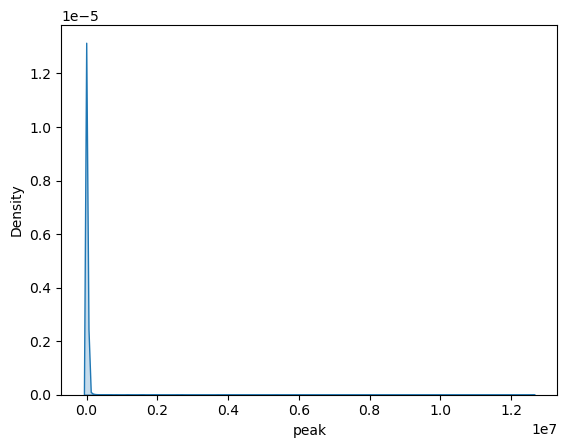

In [404]:
sns.kdeplot(df.peak,shade = True)

<Axes: xlabel='peak', ylabel='count'>

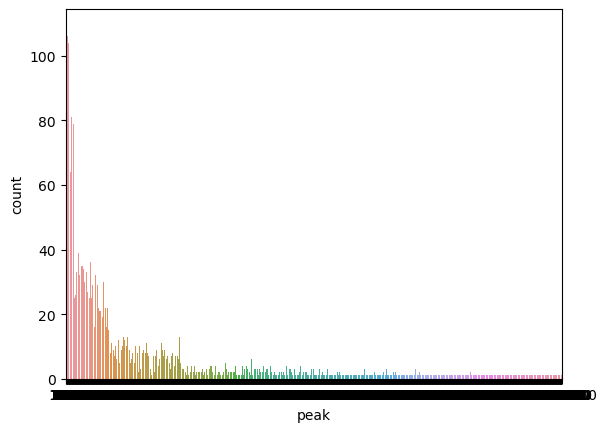

In [405]:
sns.countplot(x='peak',data=df)

In [406]:
df['peak'].corr

<bound method Series.corr of 0       51930
1       37980
2        2230
3        1260
4       10660
        ...  
9995     1300
9996     2420
9997     1940
9998     4030
9999     1770
Name: peak, Length: 10000, dtype: int64>

In [407]:
import researchpy as rp

In [408]:
rp.summary_cont(df[['peak','count','peakindex']])

/Users/aniltek/anaconda3/lib/python3.11/site-packages/researchpy/summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,peak,10000.0,11848.1180,157638.6303,1576.3863,8758.0836,14938.1524
1,count,10000.0,2231.8147,32413.1606,324.1316,1596.4515,2867.1779
2,peakindex,10000.0,2161.3402,31537.6760,315.3768,1543.1383,2779.5421


In [409]:
import statsmodels.stats.api as sms
avg=df['peak'].mean()

In [410]:
sms.DescrStatsW(df['peak']).tconfint_mean()

(8758.08357673273, 14938.152423267271)

In [411]:
df['%70 of peak'] = (df['peak']*70)/100

In [412]:
df['%70 index'] = (df['count']*70)/100

In [413]:
df

,count,peak,peakindex,%70 of peak,%70 index
0,10486,51930,10181,36351.0,7340.2
1,7561,37980,7330,26586.0,5292.7
2,259,2230,244,1561.0,181.3
3,74,1260,64,882.0,51.8
4,1962,10660,1901,7462.0,1373.4
...,...,...,...,...,...
9995,77,1300,66,910.0,53.9
9996,286,2420,270,1694.0,200.2
9997,172,1940,158,1358.0,120.4
9998,583,4030,560,2821.0,408.1


In [414]:
sms.DescrStatsW(df['%70 of peak']).tconfint_mean()

(6130.658503712913, 10456.706696287087)

In [415]:
sms.DescrStatsW(df['%70 index']).tconfint_mean()

(1117.5160610660055, 2007.0245189339912)

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X=df.drop('%70 of peak',axis=1)
y=df['%70 of peak']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [418]:
from sklearn.linear_model import LinearRegression

In [419]:
lm = LinearRegression()

In [420]:
lm.fit(X_train,y_train)

LinearRegression()

In [421]:
predictions = lm.predict(X_test)

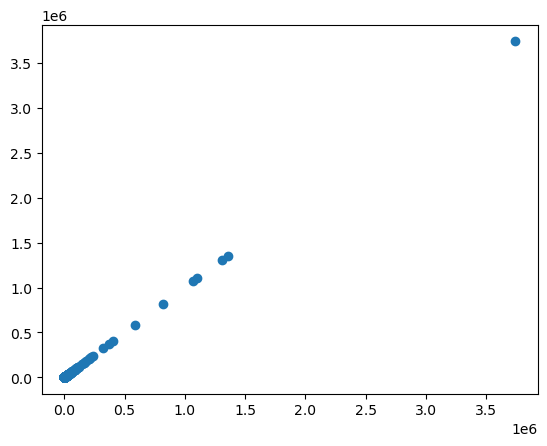

In [422]:
plt.scatter(y_test,predictions)

/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_1591/3356055679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test,predictions))


<Axes: ylabel='Density'>

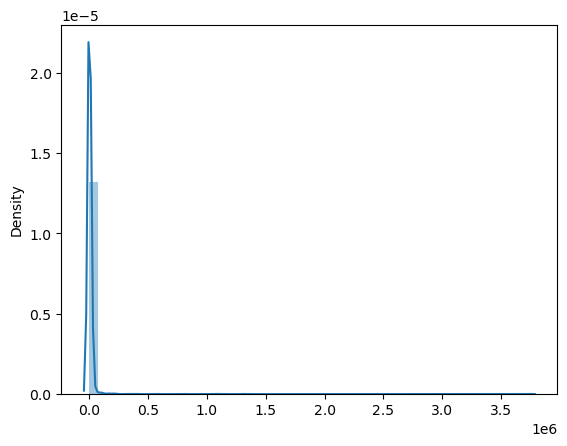

In [423]:
sns.distplot((y_test,predictions))

In [424]:
from sklearn import metrics

In [425]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.016534054878664e-11

In [426]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [427]:
predictions.mean()

8201.613

In [428]:
df['peak'].mean()

11848.118

In [429]:
df['peak'].max()

12596250